<a href="https://colab.research.google.com/github/GDSC-PolSl/ML-Sessions-01/blob/main/ML_Sessions_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Sessions 01 | Introduction to Machine Learning with Python
## Agenda
1. What is Machine Learning?
2. Machine Learning Concepts & Terminology
3. Hands-on Exercise: Implementing Cost and Gradient Descent Functions
4. Regression Exercises
5. Classification Exercises
6. Further Resources


# What is Machine Learning | Google Cloud
Machine learning is a subset of artificial intelligence that enables a system to autonomously learn and improve using neural networks and deep learning, without being explicitly programmed, by feeding it large amounts of data.

Machine learning allows computer systems to continuously adjust and enhance themselves as they accrue more “experiences.” Thus, the performance of these systems can be improved by providing larger and more varied datasets to be processed.

## How does ML work? A change in Paradigm

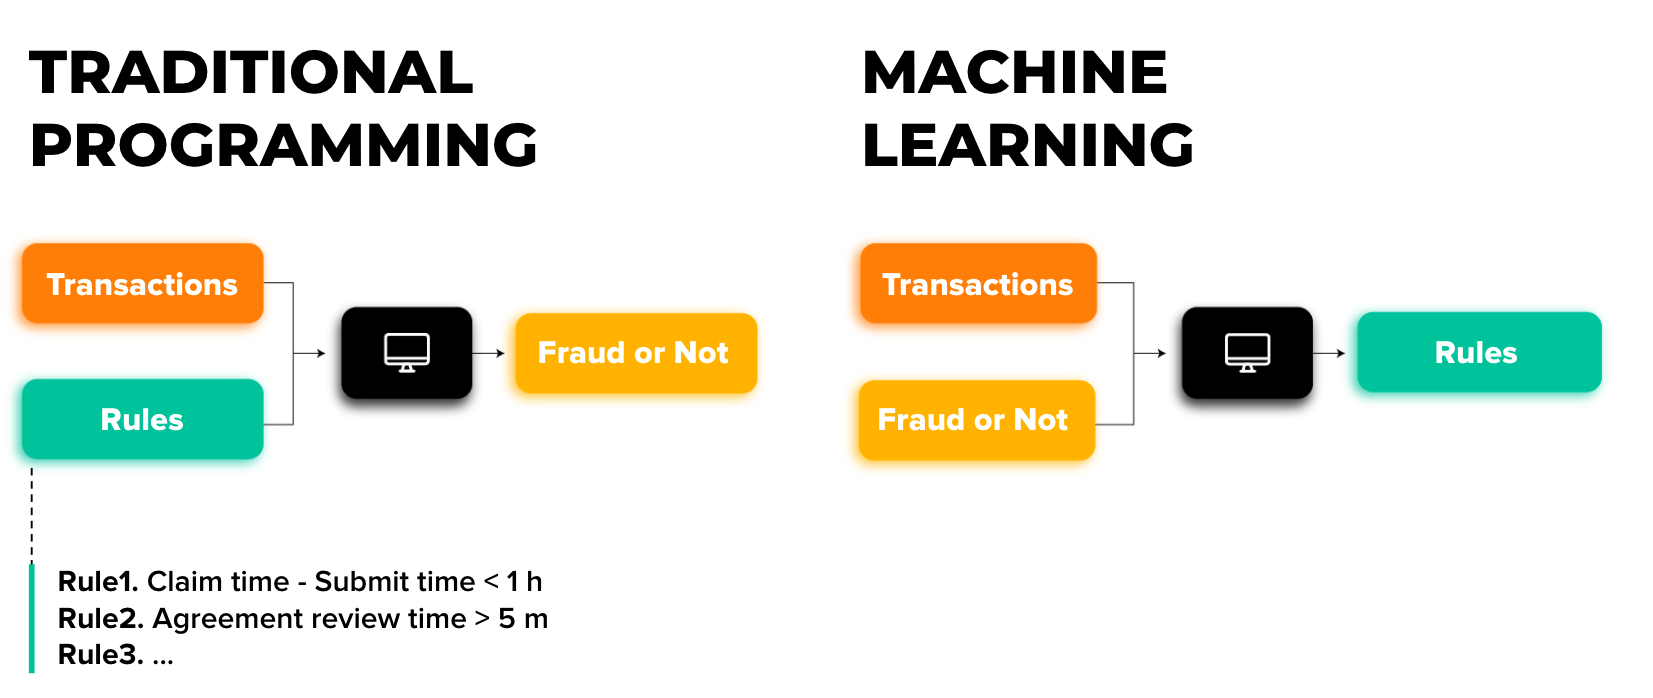

Machine learning works by training algorithms on sets of data to achieve an expected outcome such as identifying a pattern or recognizing an object. Machine learning is the process of optimizing the model so that it can predict the correct response based on the training data samples.

## Types of Machine Learning
**Supervised learning** is a machine learning model that uses labeled training data (structured data) to map a specific feature to a label. In supervised learning, the output is known (such as recognizing a picture of an apple) and the model is trained on data of the known output. In simple terms, to train the algorithm to recognize pictures of apples, feed it pictures labeled as apples.

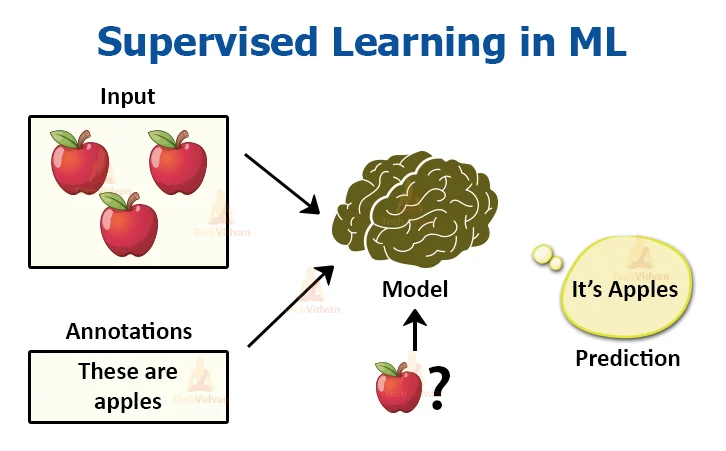

**Unsupervised learning** is a machine learning model that uses unlabeled data (unstructured data) to learn patterns. Unlike supervised learning, the “correctness” of the output is not known ahead of time. Rather, the algorithm learns from the data without human input (and is thus, unsupervised) and categorizes it into groups based on attributes. For instance, if the algorithm is given pictures of apples and bananas, it will work by itself to categorize which picture is an apple and which is a banana. Unsupervised learning is good at descriptive modeling and pattern matching.

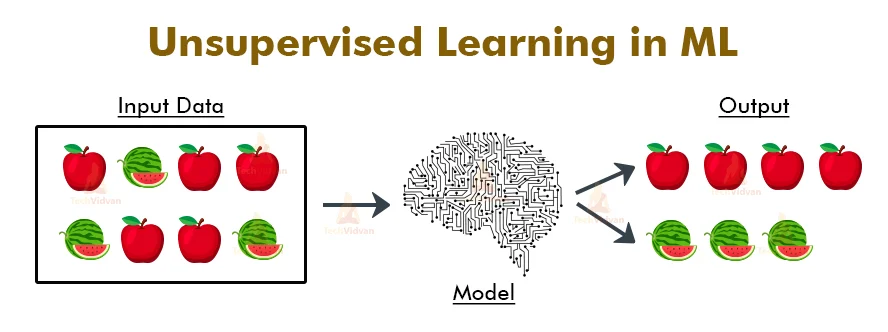

## Problem Categories Solved With Supervised Learning
1. **Regression**: A regression model predicts continuous values. For example, regression models make predictions that answer questions like the following:

* What is the value of a house in California?

* What is the probability that a user will click on this ad?

2. **Classification**: A classification model predicts discrete values. For example, classification models make predictions that answer questions like the following:

* Is a given email message spam or not spam?

* Is this an image of a dog, a cat, or a hamster?

source: [Google Cloud Docs](https://cloud.google.com/learn/what-is-machine-learning)

# Machine Learning Concepts
1. **Label**: A label is the thing we're predicting—the y variable in simple linear regression. The label could be the future price of wheat, the kind of animal shown in a picture, the meaning of an audio clip, or just about anything.
2. **Feature**: A feature is an input variable—the x variable in simple linear regression. A simple machine learning project might use a single feature, while a more sophisticated machine learning project could use millions of features
3. **Example**: An example is a particular instance of data, x.
4. **Model**: A model defines the relationship between features and label.
5. **Training**: Training means creating or learning the model. That is, you show the model labeled examples and enable the model to gradually learn the relationships between features and label.
6. **Inference** & **Prediction**: Inference means applying the trained model to unlabeled examples. That is, you use the trained model to make useful predictions (y').
7. **Hyperparameters**: hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it.
8. **Loss**: Error in a single prediction `y - y'`
8. **Cost**: Average loss over the entire training dataset (avg of all `y - y'`)

## Building a Cycle

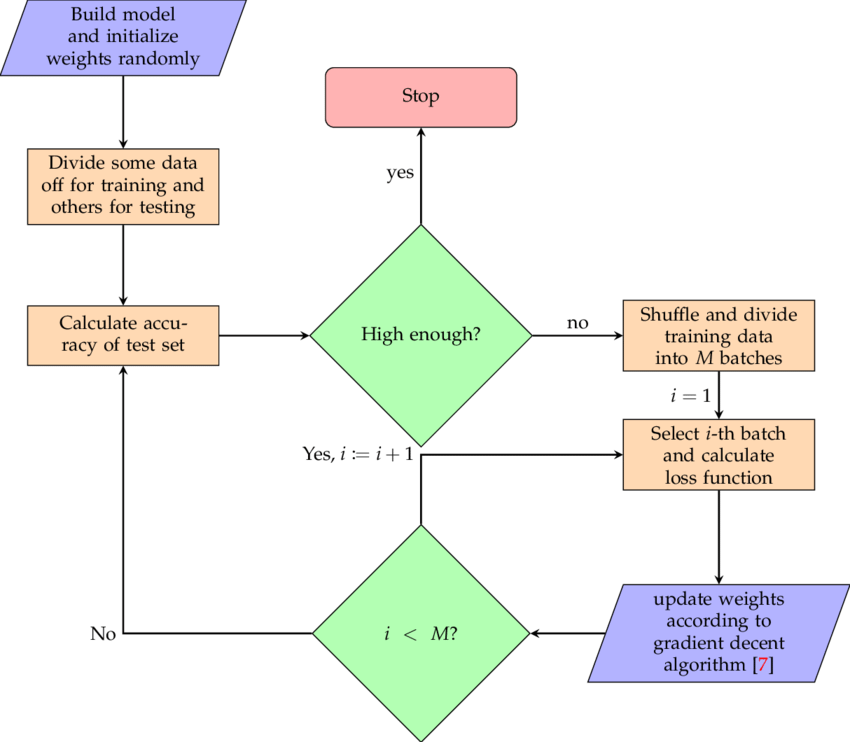

sources:

[ML Crashcourse by Google](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology)

[Google for Developers ML GLossary](https://developers.google.com/machine-learning/glossary)

# Hands-on Exercise: Implementing Cost and Gradient Descent Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
x = data['Population'].values
y = data['Profit'].values
m = len(y)

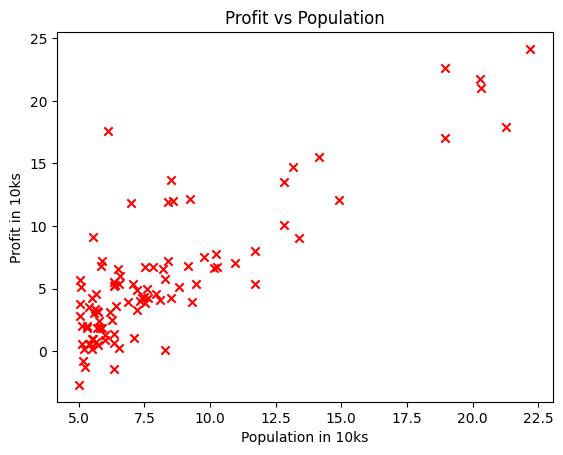

In [5]:
plt.scatter(x, y, c='red', marker='x')
plt.ylabel('Profit in 10ks')
plt.xlabel('Population in 10ks')
plt.title('Profit vs Population')

plt.show()

## Cost Function

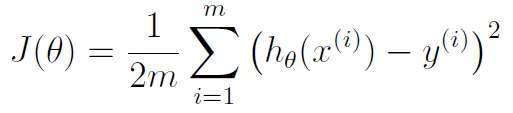

In [6]:
X = np.append(np.ones([m,1]), x.reshape(m,1), axis=1)
y = y.reshape(m,1)

theta = np.zeros([2,1])

In [7]:
def compute_cost(X, y, theta):
  # Length of the dataset
  m = len(y)

  # Hypothesis: dot product of X and theta
  predictions = X.dot(theta)

  # Compute error
  squared_error = (predictions - y)**2
  J = 1/(2*m)*(np.sum(squared_error))

  return J

### Answer | Implementation of cost function

In [ ]:
def compute_cost(X, y, theta):
  # Length of the dataset
  m = len(y)

  # Hypothesis: dot product of X and theta
  predictions = X.dot(theta)

  # Compute error
  squared_error = (predictions - y)**2
  J = 1/(2*m)*(np.sum(squared_error))

  return J

## Computing & Visualizing Cost

In [8]:
cost = compute_cost(X, y, theta)
print("Current cost", cost)

Current cost 32.072733877455676


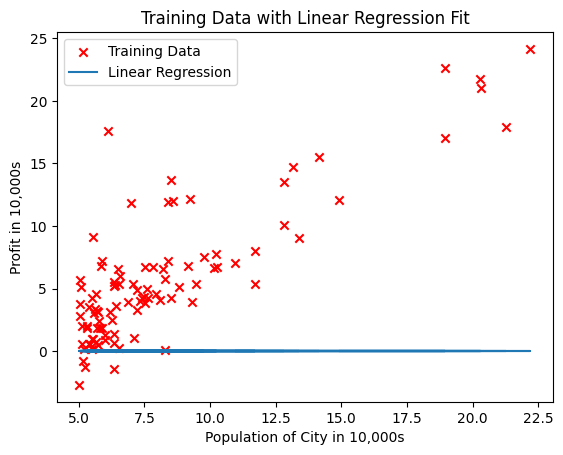

In [9]:
plt.scatter(X[:,1].reshape([m,1]),y, c='red', marker='x', label='Training Data')
plt.plot(X[:,1].reshape([m,1]), np.dot(X, theta), label='Linear Regression')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.title('Training Data with Linear Regression Fit')
plt.show()

## Gradient Descent Function
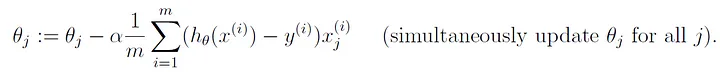

In [10]:
def gradient_descent(X, y, theta, alpha, iter):
  history = []

  m = len(y)

  for i in range(iter):
    h = X.dot(theta)
    theta = theta - (alpha/m)*(X.T.dot(h-y))

    history.append(compute_cost(X, y, theta,))

  return theta, history

### Answer | Implementation of the Gradient Descent Function

In [ ]:
def gradient_descent(X, y, theta, alpha, iter):
  history = []

  m = len(y)

  for i in range(iter):
    h = X.dot(theta)
    theta = theta - (alpha/m)*(X.T.dot(h-y))

    history.append(compute_cost(X, y, theta,))

  return theta, history

### Utilizing our Gradient Descent Function

In [14]:
# Iterations (training rounds)
iters = 1500

# Learning rate
alpha = 0.01

new_theta, history = gradient_descent(X, y, new_theta, alpha, iters)
print(new_theta)

[[-3.87805118]
 [ 1.1912525 ]]


In [15]:
new_cost = compute_cost(X, y, new_theta)
print(new_cost)

4.476999993521459


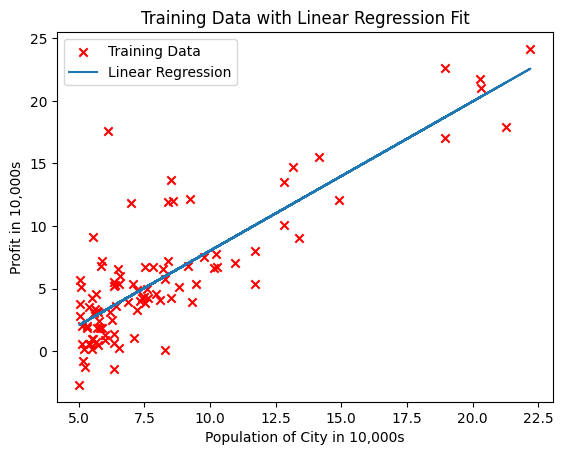

In [16]:
plt.scatter(X[:,1].reshape([m,1]),y, c='red', marker='x', label='Training Data')
plt.plot(X[:,1].reshape([m,1]), np.dot(X, new_theta), label='Linear Regression')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.title('Training Data with Linear Regression Fit')
plt.show()

# Hands-on Regression Exercises

## How does Linear Regression Work?

Linear regression is a statistical method that allows us to study relationships between two continuous (quantitative) variables:

One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
The other variable, denoted y, is regarded as the response, outcome, or dependent variable.

The goal of linear regression is to model the expected value of a dependent variable y in terms of the value of an independent variable x. In simple linear regression, we assume that if we were to plot the population of y values for each x, the distribution will form a normal curve around a line, which is called the regression line.
The equation of this line is basically the function of the linear regression model, represented as:

y=β0​+β1​x+ϵ

y is the dependent variable.
x is the independent variable.
β0​ is the y-intercept.
β1​ is the slope.
ϵ is the error term (also known as the residual).

The β values are called the model coefficients:

These values are “learned” during the model fitting/training step using the “least squares” criterion.
Then, the fitted model can be used to make predictions!

The main assumptions of a linear regression model are:

Linearity: The relationship between the predictors and the response is linear.
Independence: The observations are independent of each other.
Homoscedasticity: The variance of the errors is constant across all levels of the predictors.
Normality: The errors follow a normal distribution.

In [17]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [19]:
# View X and y shapes
print(X.shape, y.shape)

(20640, 8) (20640,)


### Exercise: set your own test size and random state

* **test_size**: This parameter determines the proportion of the dataset to include in the test split. It can be set to a float between 0.0 and 1.0. For example, test_size=0.2 means 20% of the data will be used for testing.

* **random_state**: This parameter controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. For example, random_state=42.

In [20]:
# Split the dataset into training and testing sets
# Experiment with different test sizes and random states
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

### Answer

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=132)

### Exercise: create an instance of the Linear Regression class and train your model

* **LinearRegression(_____)**: You can experiment with different hyperparameters of the LinearRegression model. For example, you could try setting fit_intercept=True or False, or changing the normalize parameter.

In [21]:
# Train a linear regression model
# Experiment with different hyperparameters
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

### Answer

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

### Exercise: Predict on testing data

In [22]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

### Answer

### Exercise: evaluate model

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6120403998814449


### Answer

### Visualize Results

In [ ]:
# Import necessary library
import matplotlib.pyplot as plt

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_pred, color='red', label='Test')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

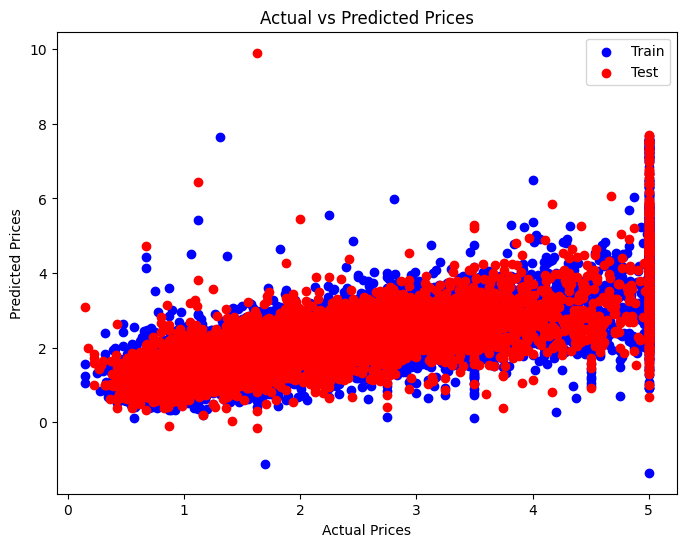

In [24]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Create a scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_pred, color='red', label='Test')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Hands-on Classification Exercises

## How does a Decison Tree Classifier Work?

A Decision Tree Classifier is a simple yet powerful classification algorithm. It belongs to the family of supervised learning algorithms where it is used for predicting class labels for given input data.

Here’s how it works:

Tree Building: The decision tree is built by partitioning the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node has all the same value of the target variable, or when splitting no longer adds value to the predictions.

Decision Making: The interior nodes of the decision tree represent the attributes (or features), and the branches between the nodes tell us the possible values that these attributes can have. The leaf nodes (also known as terminal nodes) represent the final decisions, or the class labels that we’re trying to predict.

Pruning: This is the process of reducing the size of the tree by turning some branch nodes into leaf nodes, and removing the leaf nodes under the original branch. Pruning is useful because classification trees may fit the training set well, but may do a poor job of predicting new values. A simpler tree often avoids over-fitting.

Key concepts in decision tree classifiers include:

Entropy: A measure of the randomness or unpredictability in the dataset.
Information Gain: The reduction in entropy achieved by partitioning the examples according to a given attribute.
Gini Index: It is a measure of impurity used while creating a decision tree in the CART (Classification and Regression Tree) algorithm.
The best attribute for a decision is one that provides the highest information gain, or equivalently, the smallest entropy or Gini index.

In [25]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
# Load Titanic dataset
# You can replace 'titanic.csv' with the path to your Titanic dataset file
data = pd.read_csv('train.csv')
data.dropna(inplace=True) # Remove null values from dataset to train model.
# NOTE: a better approach is to apply data preprocessing techniques to fill in this data, for instance using the mean, median or mode.

In [41]:
# Convert categorical variable into dummy/indicator variables
data = pd.get_dummies(data)

In [30]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.001122,0.001122,0.001122,...,0.002245,0.003367,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.033501,0.033501,0.033501,...,0.047351,0.057961,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
# Define predictors and target variable
X = data.drop("Pclass", axis=1)
y = data["Pclass"]

### Exercise: Set a testing size and random state
* test_size: This parameter determines the proportion of the dataset to include in the test split. It can be set to a float between 0.0 and 1.0. For example, test_size=0.2 means 20% of the data will be used for testing.

* random_state: This parameter controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. For example, random_state=42.

In [43]:
# Split the dataset into training and testing sets
# Experiment with different test sizes and random states
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Answer

In [ ]:
# Split the dataset into training and testing sets
# Experiment with different test sizes and random states
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Exercise: Create a Decision Tree Classifier Model and train it
* DecisionTreeClassifier(_____): You can experiment with different hyperparameters of the DecisionTreeClassifier model. For example, you could try setting max_depth, min_samples_split, or min_samples_leaf.

In [44]:
# Train a Decision Tree model
# Experiment with different hyperparameters
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Answer

In [ ]:
# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

### Test the model

In [45]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [49]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8648648648648649


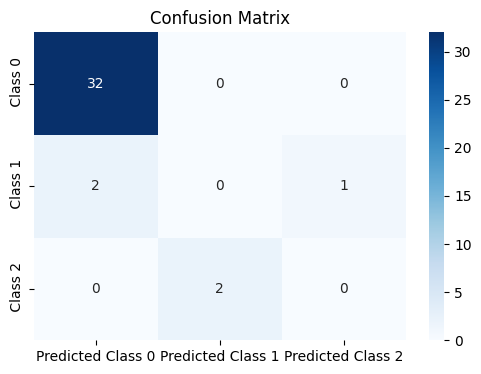

In [55]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'], index=[' Class 0', ' Class 1', ' Class 2'])

# Create a heatmap from the DataFrame
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()